In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv.csv')

In [4]:
UYUYUYUYYYYYYYYHGETdf.infRFFFFFFFFFYF98G09GIO
































VBB


































  o()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#Top 5 zip codes for 911 calls

In [7]:
df['zip'].value_counts()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
           ...  
19457.0        1
18102.0        1
19543.0        1
19545.0        1
8077.0         1
Name: zip, Length: 204, dtype: int64

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [9]:
#Unique title codes

In [11]:
len(df['title'].unique())

148

In [12]:
#Most common reasons for 911 call 

In [13]:
x = df['title'].iloc[0]

In [14]:
x.split(':')[0]

'EMS'

In [16]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [17]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [18]:
#Most common reason for 911 call based on this new column

In [19]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

In [20]:
#Create a countplot with seaborn

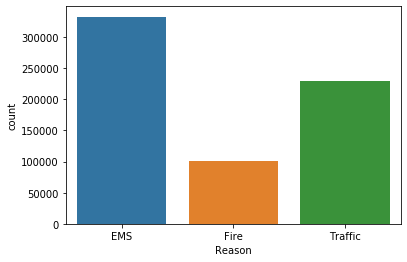

In [21]:
sns.countplot(x='Reason',data=df)

In [24]:
type(df['timeStamp'].iloc[0])

str

In [25]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [26]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [29]:
time

Timestamp('2015-12-10 17:10:52')

In [30]:
time.year

2015

In [31]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.month)

In [32]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [33]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,12,3


In [34]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [37]:
df['Day of week'] = df['Day of week'].map(dmap)

In [38]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,12,Thu


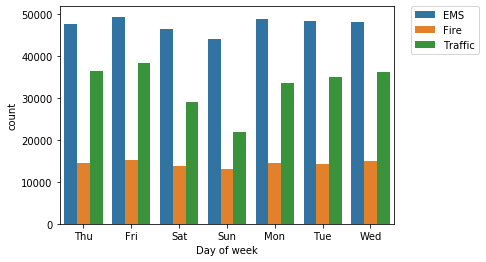

In [41]:
sns.countplot(x= 'Day of week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

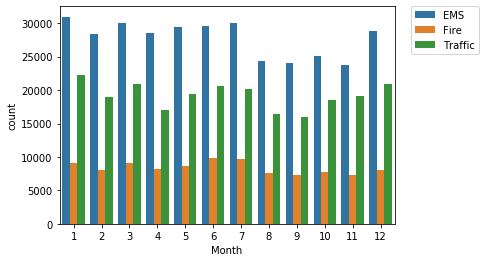

In [42]:
sns.countplot(x= 'Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [46]:
byMonth = df.groupby('Month').count()

In [47]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


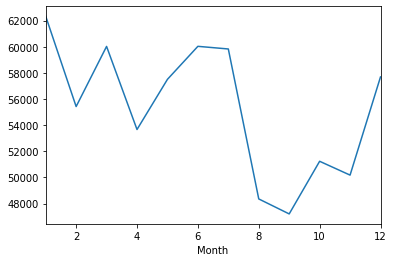

In [48]:
byMonth['lat'].plot()

No handles with labels found to put in legend.


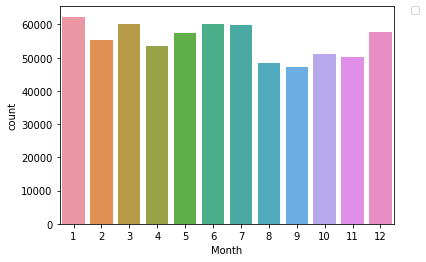

In [49]:
sns.countplot(x= 'Month',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

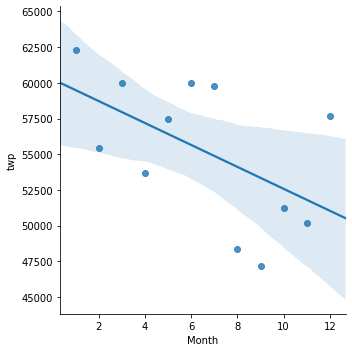

In [51]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [56]:
t = df['timeStamp'].iloc[0]

In [61]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [63]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,12,Thu,2015-12-10


In [62]:
t.date()

datetime.date(2015, 12, 10)

In [64]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


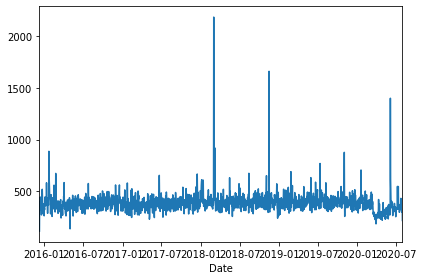

In [67]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

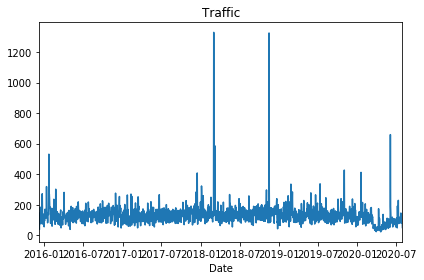

In [68]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

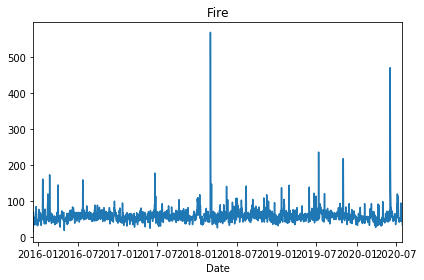

In [69]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

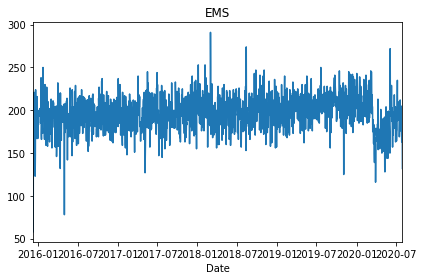

In [70]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [75]:
dayHour = df.groupby(by=['Day of week','Hour']).count()['Reason'].unstack()

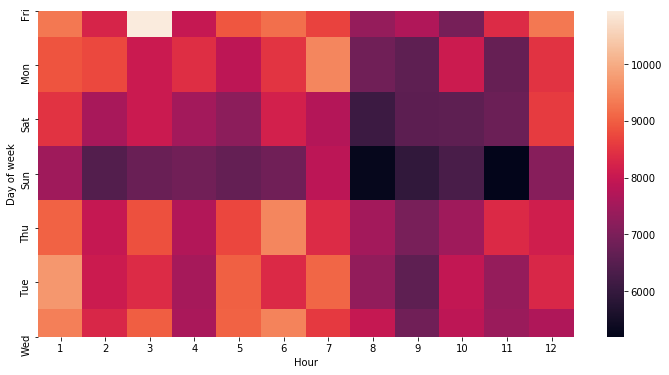

In [77]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

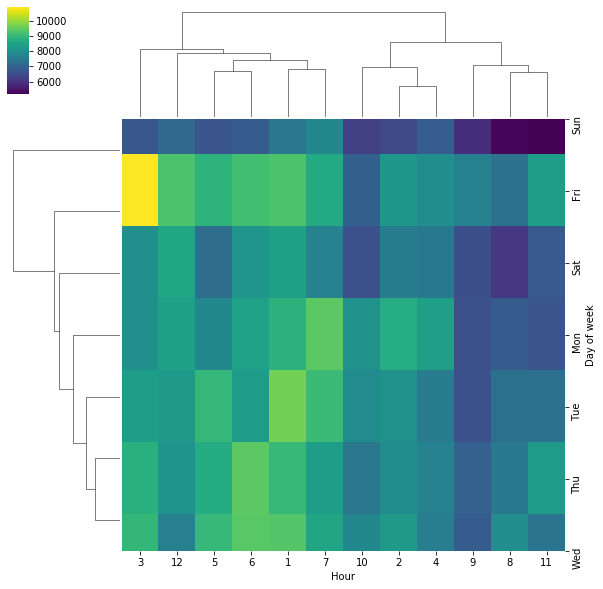

In [78]:
sns.clustermap(dayHour,cmap='viridis')